In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("profiles.csv")
df #31 column

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [4]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [5]:
null=(df.isnull().sum()).sum()
notnull = (df.notnull().sum()).sum()
total=np.product(df.shape)

In [6]:
print((null/total) * 100)
print((notnull/total)*100)

86.59547219345463
13.404527806545374


In [7]:
df=df.dropna(thresh=20) #sütunlarının 20 kadarı nansa direk o satırları kaldırdım.
df.shape

(8850, 31)

In [8]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9508,62.0,average,NaN,socially,never,graduated from college/university,"i am a libra, who is looking for a honest rela...",i am enjoy my life and exploring other opportu...,i enjoy cooking and baking for friends and fam...,"i am easy going and warm, gentle and soft spoken.",...,"san francisco, california",has a kid,straight,has dogs and dislikes cats,catholicism but not too serious about it,f,libra and it matters a lot,no,english (fluently),single
9509,28.0,athletic,strictly anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,...,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,...,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,...,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [9]:
df.isnull().sum()

age               0
body_type       709
diet           3289
drinks          319
drugs          2087
education       787
essay0          503
essay1          677
essay2          917
essay3         1249
essay4         1075
essay5         1135
essay6         1549
essay7         1361
essay8         2519
essay9         1402
ethnicity       757
height            0
income            0
job            1004
last_online       0
location          0
offspring      5094
orientation       0
pets           2672
religion       2759
sex               0
sign           1418
smokes          685
speaks            6
status            0
dtype: int64

In [10]:
df["body_type"]=df["body_type"].map({"average":1,"fit":1,"athletic":1,"thin":0,"curvy":1,"skinny":0,"a little extra":2,
                                     "overweight":2,"full figured":2,"jacked":2,"used up":3,"rather not say":2})
df["drugs"]=df["drugs"].map({"never":0, "sometimes":1, "often":2})
df["drinks"]=df["drinks"].map({"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5})
df["smokes"]=df["smokes"].map({"no":0, "trying to quit":1, "sometimes":2, "when drinking":3, "yes":4})

In [11]:
for i in ('body_type','drugs','drinks','smokes'):
    df[i]=df[i].fillna(df[i].median())

In [12]:
for i in ('body_type','age','body_type','drugs','drinks','smokes'):
    df[i]=df[i].astype(int)

In [13]:
#df["offspring"]=df["offspring"].map({"has a kid":1, "has kids":1, "has a kid, but doesn&rsquo;t want more":1, "has a kid, and might want more":1.5, "has kids, and might want more":1.5, "has a kid, and wants more":1.5,"has kids, and wants more":1.5,"doesn&rsquo;t have kids":0,"doesn&rsquo;t have kids, but might want them":0.5,"doesn&rsquo;t have kids, but wants them":0.5,"doesn&rsquo;t want kids":0})

In [14]:
df.shape 

(8850, 31)

In [15]:
df["offspring"].isnull().sum() #çoğu boş

5094

In [16]:
df=df.drop("offspring",axis=1)

In [17]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'orientation', 'pets', 'religion', 'sex',
       'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [18]:
print(df["essay1"].iloc[0])

currently working as an international agent for a freight
forwarding company. import, export, domestic you know the
works.<br />
online classes and trying to better myself in my free time. perhaps
a hours worth of a good book or a video game on a lazy sunday.


In [19]:
#essay1 -> busywith
#essay2 -> introducing
#essay3 -> looking
#essay4 -> likes(interests)
#essay5 -> likes
#essay6 -> curious
#essay7 -> infreetime
#essay8 -> intent 
#essay9 -> says

In [20]:
df['status'].value_counts()

single            8276
seeing someone     279
available          253
married             42
Name: status, dtype: int64

In [21]:
df["status"]=df["status"].map({"married":0, "seeing someone":1, "available":2, "single":3})

In [22]:
df["job"]=np.where(df["job"]=="student",0,1)

In [23]:
df['education'].str.split().str[0].value_counts()

graduated             5897
working               1650
dropped                312
college/university     124
two-year                35
masters                 19
space                   10
high                    10
ph.d                     4
law                      2
Name: education, dtype: int64

In [24]:
df['education']=df['education'].str.split().str[0]

In [25]:
df["education"].replace({"college/university":"working","masters":"graduated","two-year":"working","law":"working",
                   "space":"working","high":"working","ph.d":"working"})

0         working
1         working
2       graduated
3         working
4       graduated
          ...    
9508    graduated
9509      working
9510          NaN
9511      dropped
9513    graduated
Name: education, Length: 8850, dtype: object

In [26]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'orientation', 'pets', 'religion', 'sex',
       'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [27]:
df['last_online']=df['last_online'].str.split("-").str[0]

In [28]:
df.isnull().sum()

age               0
body_type         0
diet           3289
drinks            0
drugs             0
education       787
essay0          503
essay1          677
essay2          917
essay3         1249
essay4         1075
essay5         1135
essay6         1549
essay7         1361
essay8         2519
essay9         1402
ethnicity       757
height            0
income            0
job               0
last_online       0
location          0
orientation       0
pets           2672
religion       2759
sex               0
sign           1418
smokes            0
speaks            6
status            0
dtype: int64

In [29]:
df["pets"]=df["pets"].str.split().str[0]

In [30]:
df["pets"]=df["pets"].fillna(df["pets"].mode()[0])

<AxesSubplot:xlabel='age', ylabel='pets'>

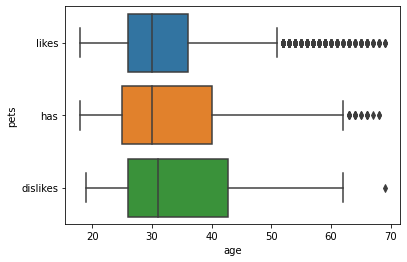

In [101]:
sns.boxplot("age","pets",data=df)

In [31]:
df["education"]=df["education"].fillna(df["education"].mode()[0])

In [32]:
df["religion"].str.split().str[0].value_counts()

agnosticism     1349
other           1167
atheism         1106
christianity     872
catholicism      732
judaism          476
buddhism         282
hinduism          78
islam             29
Name: religion, dtype: int64

In [33]:
df["religion"]=df["religion"].str.split().str[0]

In [34]:
df["religion"]=df["religion"].fillna(df["religion"].mode()[0])

In [35]:
df["speaks"].value_counts()

english                                                                    3005
english (fluently)                                                         1072
english (fluently), spanish (okay)                                          319
english (fluently), spanish (poorly)                                        310
english (fluently), spanish (fluently)                                      185
                                                                           ... 
english, greek (poorly), spanish (okay)                                       1
english (fluently), french (fluently), german (okay)                          1
english, french (okay), spanish (okay), c++ (poorly), sanskrit (poorly)       1
english (fluently), hawaiian (poorly), latin (poorly)                         1
english, spanish (okay), hebrew (okay)                                        1
Name: speaks, Length: 1725, dtype: int64

In [36]:
df["speaks"]=df["speaks"].astype("category")

In [37]:
df["speaks"]=df['speaks'].apply(lambda x:len(list(x.split(','))))

In [38]:
df['speaks']=df["speaks"].fillna(df['speaks'].median())

In [39]:
df['speaks']=df["speaks"].astype(int)

<AxesSubplot:xlabel='speaks', ylabel='education'>

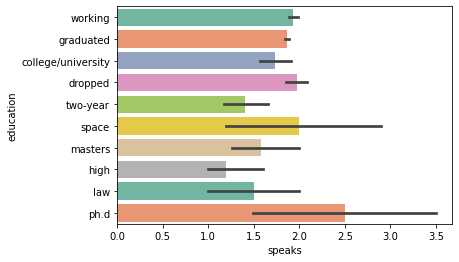

In [128]:
sns.barplot(x=df.speaks,y=df.education, palette='Set2')

In [40]:
df["sign"].str.split().str[0].value_counts()

leo            672
aries          650
aquarius       645
gemini         641
cancer         639
virgo          637
libra          633
taurus         627
pisces         601
scorpio        600
sagittarius    586
capricorn      501
Name: sign, dtype: int64

In [41]:
df["sign"]=df["sign"].str.split().str[0] 

In [42]:
df['sign']=df["sign"].astype("category")

In [43]:
df.sign.mode()[0] #SİGN İS İMPORTANT -> FİLLNA WİTH REGRESSİON?

'leo'

In [60]:
Millennial=0
GenX_er=0
Boomers=0
generation = []
for i in range(len(df)):
    if 17 < int(df["age"].iloc[i])<33:
        generation.append(0)
        Millennial+=1
    elif 32 < int(df["age"].iloc[i])<48:
        generation.append(1)
        GenX_er+=1
    else:
        generation.append(2)
        Boomers+=1

print("Millennial = ", Millennial)
print("GenX_er = ", GenX_er)
print("Boomers = ", Boomers)
df["generation"] = generation

Millennial =  5623
GenX_er =  2523
Boomers =  704


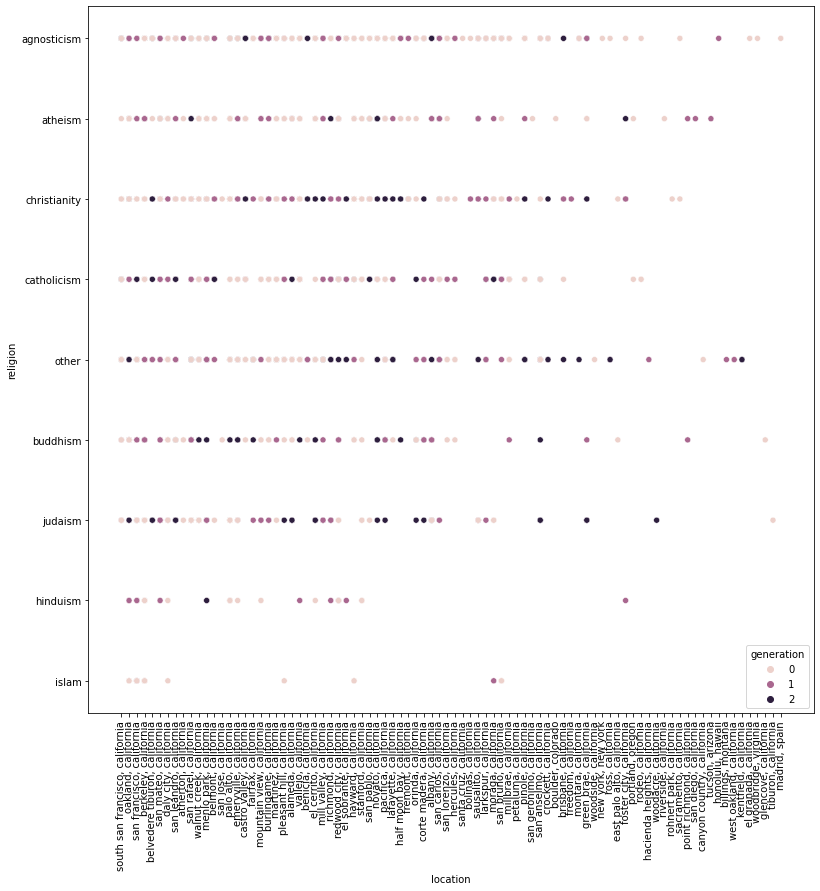

In [115]:
fig=plt.figure(figsize=(13,13))
sns.scatterplot(x="location",y="religion",hue="generation",data=df)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='generation', ylabel='drugs'>

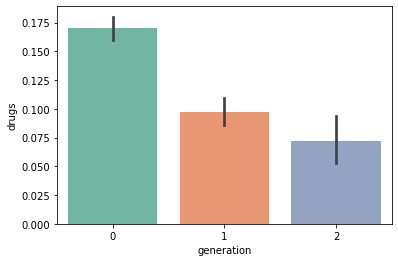

In [120]:
sns.barplot(x=df.generation,y=df.drugs, palette='Set2')

### WİTHOUT ESSAYS

In [63]:
df2=df[['age', 'body_type', 'drinks', 'drugs', 'education', 'height', 'income', 'job',
       'last_online', 'orientation', 'pets', 'religion', 'sex','sign', 'smokes', 'speaks', 'status','generation']]

In [64]:
df2

,age,body_type,drinks,drugs,education,height,income,job,last_online,orientation,pets,religion,sex,sign,smokes,speaks,status,generation
0,22,2,2,0,working,75.0,-1.0,1,2012,straight,likes,agnosticism,m,gemini,2,1,3,0
1,35,1,3,1,working,70.0,80000.0,1,2012,straight,likes,agnosticism,m,cancer,0,3,3,1
2,38,0,2,0,graduated,68.0,-1.0,1,2012,straight,has,agnosticism,m,pisces,0,3,2,1
3,23,0,2,0,working,71.0,20000.0,0,2012,straight,likes,agnosticism,m,pisces,0,2,3,0
4,29,1,2,0,graduated,66.0,-1.0,1,2012,straight,likes,agnosticism,m,aquarius,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,62,1,2,0,graduated,60.0,-1.0,1,2011,straight,has,catholicism,f,libra,0,1,3,2
9509,28,1,2,0,working,73.0,60000.0,1,2012,straight,likes,christianity,m,aries,0,2,3,0
9510,31,1,2,1,graduated,72.0,-1.0,1,2012,gay,likes,atheism,m,scorpio,2,1,3,0
9511,34,1,2,0,dropped,71.0,-1.0,1,2012,gay,likes,atheism,m,leo,3,1,3,1


In [65]:
df2.isna().sum()

age               0
body_type         0
drinks            0
drugs             0
education         0
height            0
income            0
job               0
last_online       0
orientation       0
pets              0
religion          0
sex               0
sign           1418
smokes            0
speaks            0
status            0
generation        0
dtype: int64

In [67]:
df2=pd.get_dummies(df2)

In [69]:
from pycaret.regression import *
exp_name=setup(data=df2,target='age')

,Description,Value
0,session_id,747
1,Target,age
2,Original Data,"(8850, 52)"
3,Missing Values,False
4,Numeric Features,49
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6194, 54)"


In [70]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.9720,13.1928,3.6313,0.8486,0.1100,0.0955,0.0720
ridge,Ridge Regression,2.9961,13.3901,3.6585,0.8464,0.1111,0.0963,0.0070
br,Bayesian Ridge,2.9959,13.3889,3.6583,0.8464,0.1111,0.0963,0.0070
lr,Linear Regression,2.9969,13.3968,3.6594,0.8463,0.1111,0.0963,0.2720
lar,Least Angle Regression,2.9970,13.3967,3.6594,0.8463,0.1111,0.0963,0.0080
omp,Orthogonal Matching Pursuit,3.0199,13.4811,3.6709,0.8454,0.1116,0.0971,0.0050
lightgbm,Light Gradient Boosting Machine,2.9997,13.6779,3.6975,0.8431,0.1112,0.0961,0.0340
ada,AdaBoost Regressor,3.1018,14.0177,3.7432,0.8391,0.1137,0.1000,0.0400
rf,Random Forest Regressor,3.1071,14.8146,3.8485,0.8300,0.1162,0.0998,0.2440
xgboost,Extreme Gradient Boosting,3.1089,15.0176,3.8742,0.8276,0.1170,0.0998,0.4520


In [75]:
from pycaret.classification import *
exp_name=setup(data=df2.drop("age",axis=1),target='generation')

,Description,Value
0,session_id,7345
1,Target,generation
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(8850, 51)"
5,Missing Values,False
6,Numeric Features,49
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [76]:
best_model=compare_models() #age sütunu olunca(corr->%90) %100 doğru ölçüyor.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6511,0.6803,0.3935,0.5867,0.5872,0.1543,0.1829,0.0500
gbc,Gradient Boosting Classifier,0.6493,0.7070,0.3725,0.5692,0.5713,0.1214,0.1556,0.2380
ridge,Ridge Classifier,0.6480,0.0000,0.3560,0.5465,0.5496,0.0816,0.1260,0.0070
lda,Linear Discriminant Analysis,0.6456,0.6914,0.3760,0.5764,0.5633,0.1067,0.1439,0.0110
lr,Logistic Regression,0.6406,0.5269,0.3333,0.4104,0.5003,0.0000,0.0000,0.0280
nb,Naive Bayes,0.6406,0.5885,0.3333,0.4104,0.5003,0.0000,0.0000,0.0080
lightgbm,Light Gradient Boosting Machine,0.6382,0.6910,0.3932,0.5770,0.5867,0.1505,0.1673,0.1410
catboost,CatBoost Classifier,0.6319,0.6875,0.3894,0.5701,0.5829,0.1436,0.1577,4.5890
xgboost,Extreme Gradient Boosting,0.6313,0.6844,0.3941,0.5740,0.5856,0.1483,0.1613,0.5920
rf,Random Forest Classifier,0.6117,0.6587,0.3843,0.5584,0.5749,0.1271,0.1338,0.0830
